# Исследование данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2678,72,84.20,5986.55,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3128,46,91.30,4126.35,Female,1,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),0
3203,69,19.30,1447.9,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3505,1,21.00,21,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,1
1976,21,61.65,1393.6,Male,0,No,No,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,0


In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

cool, nan'ов нет...

In [6]:
data['TotalSpent'] = data['TotalSpent'].apply(lambda x :  np.NAN if x == ' ' else float(x))
data.dropna(inplace=True)

In [7]:
df_num = data[num_cols]
df_cat = data[cat_cols]
data.shape


(5273, 20)

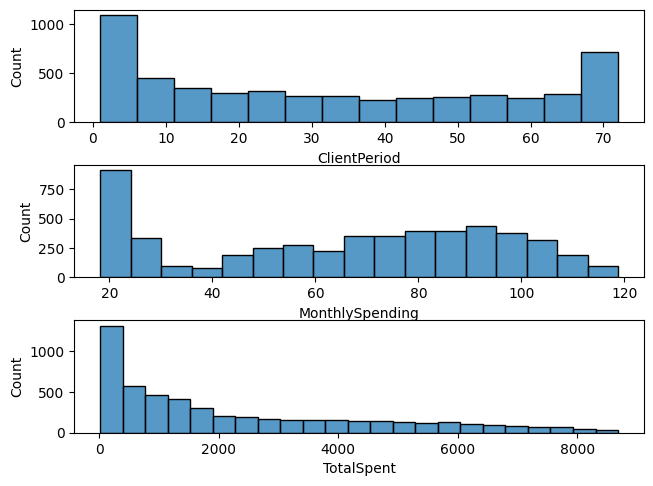

In [8]:
fig, ax = plt.subplots(len(df_num.columns))
fig.tight_layout(pad=1.0)
for i, col in enumerate(df_num.columns):
    sns.histplot(ax=ax[i], data=df_num[col])
plt.show()

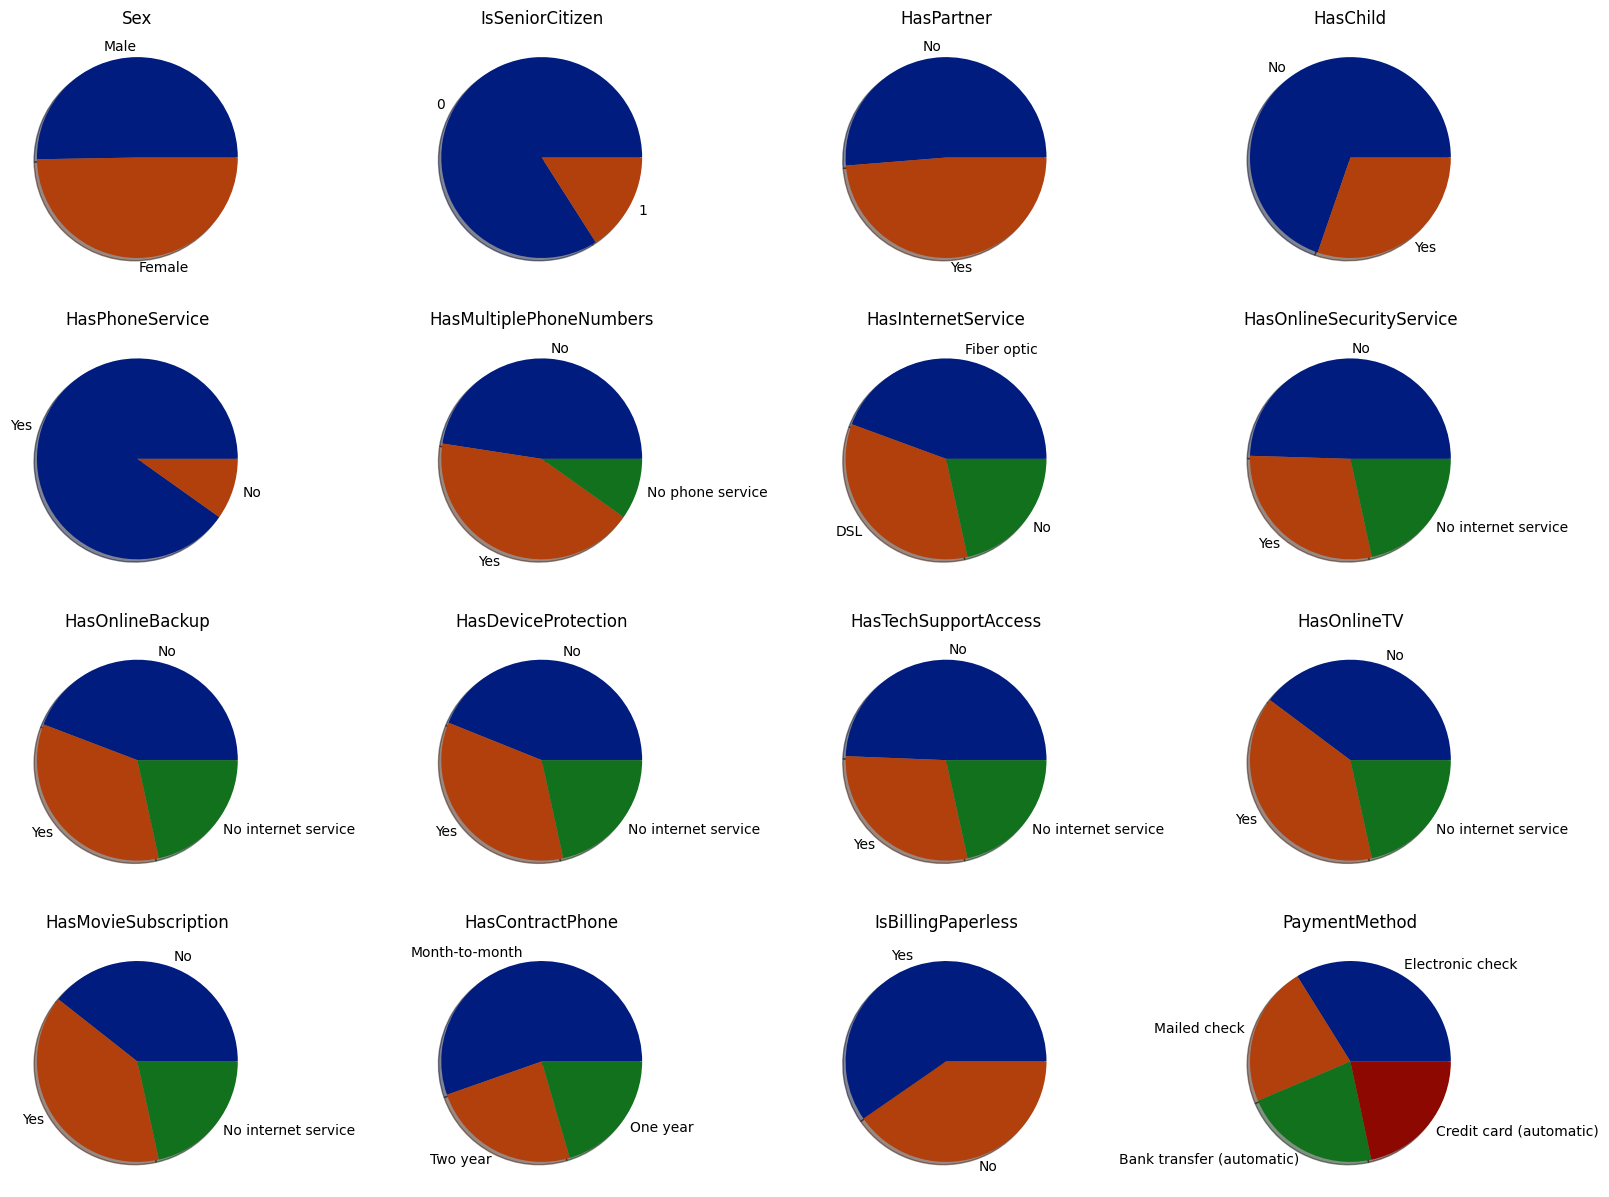

In [9]:
fig, ax = plt.subplots(len(cat_cols) // 4, 4)
fig.set_size_inches(20, 15)
colors = sns.color_palette('dark')
for i in range(len(cat_cols)):
    data_vals = data[cat_cols[i]].value_counts()
    plot_idx = ax[i // 4, i % 4]
    plot_idx.pie(data_vals, labels = data_vals.index, shadow = True, colors=colors)
    plot_idx.title.set_text(cat_cols[i])

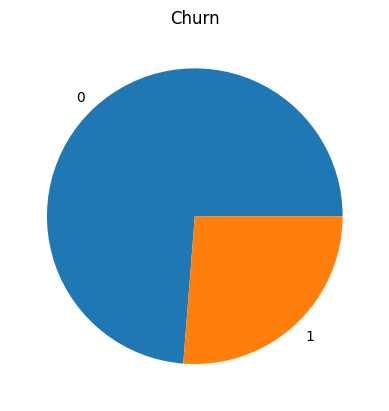

In [10]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].value_counts().index)
plt.title(target_col)
plt.show()


Классы являются несбалансированными

# Обучение

## Линейная модель

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import roc_curve


In [12]:
import warnings
warnings.filterwarnings('ignore')

ct = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_cols),
    ("num", StandardScaler(), num_cols)
])


pipe = Pipeline([
    ('transform', ct)
])

grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1, 0.1, 0.01, 0.001]
}

clf = Pipeline([
    ('data trans', pipe), 
    ('grid', GridSearchCV(LogisticRegression(max_iter=10000, solver='saga', l1_ratio=0.5), param_grid=grid, cv=5, refit=True))
])


X = data[feature_cols]
y = data[target_col]

clf.fit(X, y)


Pipeline(steps=[('data trans',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('cat',
                                                                   OneHotEncoder(),
                                                                   ['Sex',
                                                                    'IsSeniorCitizen',
                                                                    'HasPartner',
                                                                    'HasChild',
                                                                    'HasPhoneService',
                                                                    'HasMultiplePhoneNumbers',
                                                                    'HasInternetService',
                                                                    'HasOnlineSecurityService',
                                                                    'HasOnlineBackup',
                                                                    'HasDeviceProtection',
                                                                    'HasTechSupportAccess',
                                                                    'HasOnlineTV',
                                                                    'HasMovieSubscription',
                                                                    'HasContractPhone',
                                                                    'IsBillingPaperless',
                                                                    'PaymentMethod']),
                                                                  ('num',
                                                                   StandardScaler(),
                                                                   ['ClientPeriod',
                                                                    'MonthlySpending',
                                                                    'TotalSpent'])]))])),
                ('grid',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(l1_ratio=0.5,
                                                           max_iter=10000,
                                                           solver='saga'),
                              param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                                          'penalty': ['l1', 'l2',
                                                      'elasticnet']}))])

In [13]:
best_model = clf.named_steps['grid'].best_estimator_

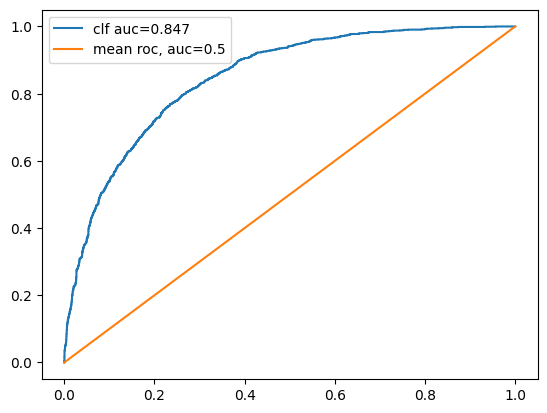

In [16]:
y_pred = clf.predict_proba(X)[:, 1]
y_mean = np.full_like(y, fill_value=y.mean())

fpr, tpr, _ = roc_curve(y, y_pred)
auc = round(roc_auc_score(y, y_pred), 3)
plt.plot(fpr, tpr, label="clf auc="+str(auc))



fpr, tpr, _ = roc_curve(y, y_mean)
auc = round(roc_auc_score(y, y_mean), 3)
plt.plot(fpr, tpr, label="mean roc, auc="+str(auc))


plt.legend()
plt.show()

Внимание проверяющим, нет train_test_split, есть CV, он внутри gridsearchcv, не занижайте баллы товарищи... 

In [17]:
best_model

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   solver='saga')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

лучший auc-roc = 0.847 с параметрами C=0.1, penalty='elasticnet'

In [18]:
warnings.filterwarnings('default')

## Градиентный бустинг

In [19]:
from catboost import CatBoostClassifier

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, stratify=y)

In [ ]:
boosting_clf = CatBoostClassifier(
    n_estimators=1000,
    cat_features=cat_cols,
    eval_metric='AUC:hints=skip_train~false'
)

grid = {
    "learning_rate" : [0.01, 0.1, 1],
    "max_depth" : [3, 5, 7]
}

res = boosting_clf.grid_search(param_grid=grid, X=train_X, y=train_y)


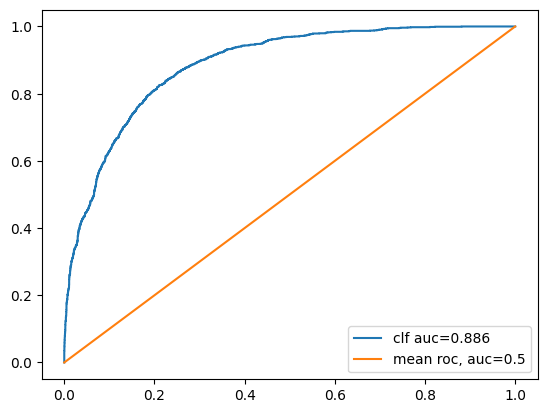

In [22]:
clf = boosting_clf  

y_pred = clf.predict_proba(X)[:, 1]
y_mean = np.full_like(y, fill_value=y.mean())

fpr, tpr, _ = roc_curve(y, y_pred)
auc = round(roc_auc_score(y, y_pred), 3)
plt.plot(fpr, tpr, label="clf auc="+str(auc))



fpr, tpr, _ = roc_curve(y, y_mean)
auc = round(roc_auc_score(y, y_mean), 3)
plt.plot(fpr, tpr, label="mean roc, auc="+str(auc))


plt.legend()
plt.show()

In [ ]:
boosting_clf.best_score_

{'learn': {'Logloss': 0.3295718998743675, 'AUC': 0.9127942141952224}}

In [ ]:
res['params']

{'depth': 3, 'learning_rate': 0.1}

Лучший auc: 0.87 с параметрами depth: 3, learning_rate: 0.1

# Предсказания

In [ ]:
best_model = boosting_clf

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[: , 1]
submission.to_csv('./my_submission.csv', index=False)

# Результат

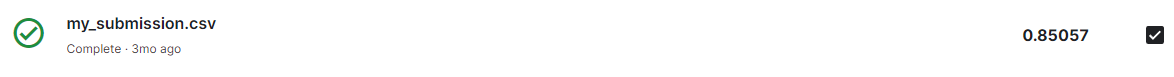